# Image Classification with larger CNN

The goal of this exercise is to program a slightly larger CNN that incorporates some of the ideas that have been presented in the class. We use CIFAR-100, which is a bit more challenging than the MNIST data set, but not so much. It contains 50000 images that are labelled into 100 fine-grained classes of 20 more coarse grained classes. In order to make the task a mit more complicated we will use the fine grained classes.

The dataset is build into keras.

In [5]:
import keras
import keras.datasets
import keras.datasets.cifar100
import keras.utils
import keras.optimizers
import numpy as np
from wandb.integration.keras import WandbMetricsLogger
from keras import regularizers
import tensorflow as tf
# from tensorflow.keras import layers, regularizers
from keras import layers, regularizers

import os

os.environ["KERAS_BACKEND"] = "torch"

import wandb

import matplotlib.pyplot as plt

print(keras.__version__)

3.6.0


In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_14704/3472643319.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y_train[index]))


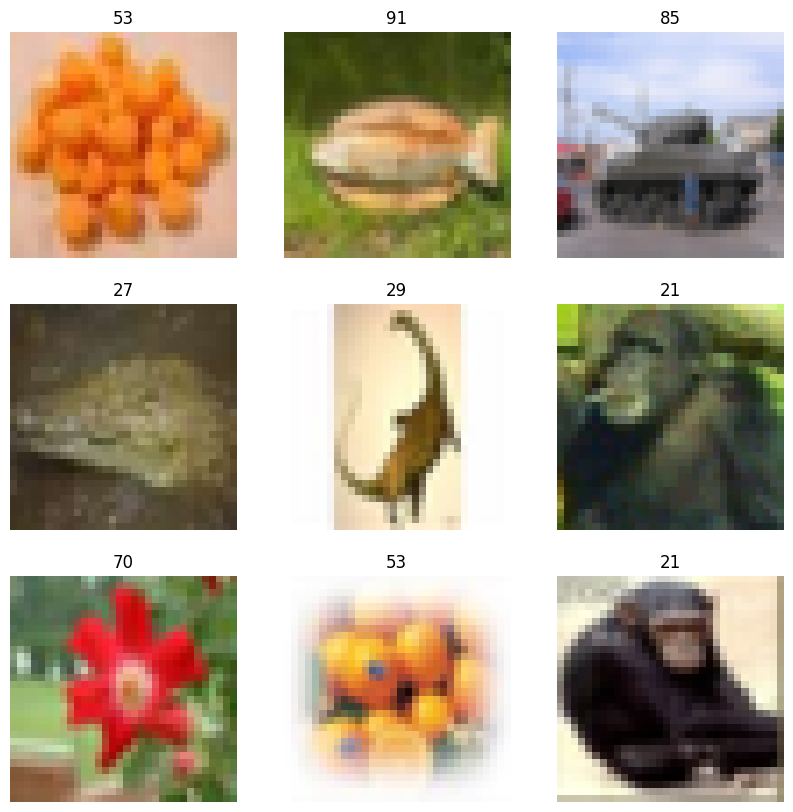

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(50000)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(x_train[index]).astype("uint8"))
    plt.title(int(y_train[index]))
    plt.axis("off")

In [8]:
num_classes = 100
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [85]:
def build_model():
    inp = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    #x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(100, activation='softmax')(x)

    return keras.Model(inp, x)

In [86]:
model = build_model()

In [87]:
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_144 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_145 (Conv2D)             │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_146 (Conv2D)             │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │       204,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,148 (1.14 MB)

 Trainable params: 298,148 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
batch_size = 128
epochs = 1
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0207 - loss: 4.7408 - val_accuracy: 0.0896 - val_loss: 3.9956


The performance is not bad, but also not so great. The best results without using additional data for convolutional neural networks is at about 70 percent.

In [89]:
print(history.history)

{'accuracy': [0.03708888962864876], 'loss': [4.418914318084717], 'val_accuracy': [0.08959999680519104], 'val_loss': [3.9956307411193848]}


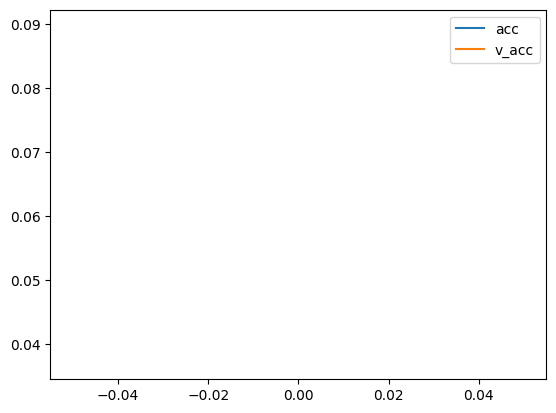

In [90]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='acc')
ax.plot(history.history['val_accuracy'], label='v_acc')
plt.legend()
plt.show()

## Exercise 1: Modern CNN

A *modern* CNN should have some of the features discussed in the lecture. Build a model that includes some or all of these:
- ResNet architecture with skip connections
- Batch Normalization
- L2 Regularisation
- Dropout

How does you model perform?

In [91]:
def build_improved_model():
    inp = tf.keras.Input(shape=(32, 32, 3))

    # Block 1
    x_res = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(inp)
    x = layers.BatchNormalization()(x_res)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.25)(x)

    # Block 2
    x_res = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.3)(x)

    # Block 3
    x_res = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.4)(x)

    # Block 4
    x_res = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.5)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.L2(1e-4))(x)

    return tf.keras.Model(inp, x)


In [92]:
model = build_improved_model()
model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_150 (Conv2D) │ (None, 32, 32,    │        896 │ input_layer_36[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_150[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_85       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_151 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_85[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_151[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_86       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_86[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_152[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_43 (Add)        │ (None, 32, 32,    │          0 │ conv2d_150[0][0], │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_87       │ (None, 32, 32,    │          0 │ add_43[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_70    │ (None, 16, 16,    │          0 │ activation_87[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 16, 16,    │          0 │ max_pooling2d_70… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ spatial_dropout2… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_88       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_154 (Conv2D) │ (None, 16, 16,    │     18,496 │ activation_88[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_154[0][0]

 Total params: 1,074,276 (4.10 MB)

 Trainable params: 1,072,356 (4.09 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [93]:
import wandb

early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Initialize W&B project and config
wandb.init(
    project="cifar_TSM_CompVis",
    config={
        "batch_size": batch_size,
        "epochs": epochs,
        "optimizer": "Adam",
        "learning_rate": 0.01,
    },
)
batch_size = 128
epochs = 30

# Build and compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model with WandbCallback to log metrics
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[WandbMetricsLogger(), early_stopping]
)

epoch/accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▄▄▅▆▆▇▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇█▇██▇▇
epoch/val_loss,█▅▄▄▃▂▃▂▃▃▂▂▂▂▂▂▁▁▂▂▂▁▁▁▁▁▁▁▂▃
epoch/accuracy,0.23387
epoch/epoch,29
epoch/learning_rate,0.01
epoch/loss,3.18543
epoch/val_accuracy,0.174


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.0097 - loss: 4.6258 - val_accuracy: 0.0076 - val_loss: 4.6087
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0100 - loss: 4.6074 - val_accuracy: 0.0088 - val_loss: 4.6102
Epoch 3/30
140/352 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0102 - loss: 4.6082

KeyboardInterrupt: 

## Exercise 2: Monitoring

Monitoring the training is essential for long running training sessions. Include tensorboard or wandb in your training setup.

## Exercise 3: Data Augmentation (continued next lesson)

What else could be done to get better results? The dataset is quite small, so either another dataset could be used for pretraining, or data augmentation could be added....

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Random horizontal flip
    layers.RandomRotation(0.1),  # Random rotation within 10% of the total range
    layers.RandomZoom(0.1),  # Random zoom within 10%
    layers.RandomTranslation(0.1, 0.1),  # Random translation by 10% of width and height
    layers.RandomContrast(0.1),  # Random contrast adjustment within 10%
])

In [13]:
def build_improved_model_augment():
    inp = tf.keras.Input(shape=(32, 32, 3))

    # Augment the data
    x = data_augmentation(inp)

    # Block 1
    x_res = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(inp)
    x = layers.BatchNormalization()(x_res)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.25)(x)

    # Block 2
    x_res = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.3)(x)

    # Block 3
    x_res = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.4)(x)

    # Block 4
    x_res = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.4)(x)

    # Global Average Pooling
    x = layers.Flatten()(x)

    # Fully Connected Layer
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.L2(1e-4))(x)

    return tf.keras.Model(inp, x)

In [14]:
model = build_improved_model_augment()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      9,248 │ activation_11[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │      9,248 │ activation_12[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 32, 32,    │          0 │ conv2d_11[0][0],  │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 32, 32,    │          0 │ add_4[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 16, 16,    │          0 │ activation_13[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_4 │ (None, 16, 16,    │          0 │ max_pooling2d_4[… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ spatial_dropout2… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 16, 16,    │     18,496 │ activation_14[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_15[0][0] 

 Total params: 1,270,884 (4.85 MB)

 Trainable params: 1,268,964 (4.84 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [18]:
import wandb

batch_size = 128
epochs = 30
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Initialize W&B project and config
wandb.init(
    project="cifar_TSM_CompVis",
    config={
        "batch_size": batch_size,
        "epochs": epochs,
        "optimizer": "Adam",
        "learning_rate": 0.01,
    },
)
batch_size = 128
epochs = 30

# Build and compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model with WandbCallback to log metrics
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[WandbMetricsLogger(), early_stopping]
)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 70s 193ms/step - accuracy: 0.0108 - loss: 5.2764 - val_accuracy: 0.0078 - val_loss: 4.8406
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 70s 200ms/step - accuracy: 0.0101 - loss: 4.7881 - val_accuracy: 0.0082 - val_loss: 4.6868
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 69s 196ms/step - accuracy: 0.0098 - loss: 4.6778 - val_accuracy: 0.0098 - val_loss: 4.8607
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 69s 195ms/step - accuracy: 0.0116 - loss: 4.7831 - val_accuracy: 0.0092 - val_loss: 4.7448
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 192ms/step - accuracy: 0.0114 - loss: 4.7156 - val_accuracy: 0.0078 - val_loss: 4.6894
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 190ms/step - accuracy: 0.0100 - loss: 4.6716 - val_accuracy: 0.0088 - val_loss: 4.6453
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 69s 195ms/step - accuracy: 0.0089 - loss: 4.6384 - val_accuracy: 0.0084 - val_loss: 4.6307
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 194ms/step - accuracy: 0.0102 - loss: 4

# Transfer Learning


In [27]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

In [28]:
inputs = keras.Input(shape=(32, 32, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(100)(x)
model = keras.Model(inputs, outputs)

In [29]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

wandb.init(
    project="cifar_TSM_CompVis",
    config={
        "batch_size": batch_size,
        "epochs": epochs,
        "optimizer": "Adam",
        "learning_rate": 0.01,
    },
)

# train the model on the new data for a few epochs
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[WandbMetricsLogger()])

epoch/epoch,▁▅█
epoch/learning_rate,▁▁▁
epoch/loss,▁██
epoch/val_loss,▁▁▁
epoch/epoch,2
epoch/learning_rate,0.001
epoch/loss,9.01216
epoch/val_loss,9.15185


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 7.5326 - val_loss: 10.8971
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 8.5921 - val_loss: 10.8378
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 6.1708 - val_loss: 5.2803
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 5.1612 - val_loss: 5.2803
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 5.2432 - val_loss: 5.2803
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 5.1698 - val_loss: 5.2803
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 5.1907 - val_loss: 5.2803
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 5.1410 - val_loss: 5.2803
Epoch 9/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 5.1632 - val_loss: 5.2803
Epoch 10/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 5.1751 - val_loss: 5.2803
Epoch 11/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 5.1413 - val_loss: 5.2803
Epoch 12/30
352/352 ━━━━━━━━

In [31]:
# Test performance
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

TypeError: 'float' object is not subscriptable